# Pymaceuticals Inc.
---

### Analysis

- Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua.
- Elit ullamcorper dignissim cras tincidunt lobortis feugiat. Quam adipiscing vitae proin sagittis nisl. Euismod quis viverra nibh cras pulvinar mattis. Nulla aliquet porttitor lacus luctus. 
- Molestie nunc non blandit massa enim nec. Congue mauris rhoncus aenean vel elit scelerisque mauris pellentesque pulvinar. Lobortis mattis aliquam faucibus purus in. Odio tempor orci dapibus ultrices in. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, on='Mouse ID')
# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
number_of_mice = len(combined_df['Mouse ID'].unique())
number_of_mice

249

In [3]:
combined_df.columns.to_list()

['Mouse ID',
 'Drug Regimen',
 'Sex',
 'Age_months',
 'Weight (g)',
 'Timepoint',
 'Tumor Volume (mm3)',
 'Metastatic Sites']

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
combined_df.loc[combined_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()

array(['g989'], dtype=object)

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df.loc[(combined_df['Mouse ID'] != 'g989')]
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
number_of_mice = len(clean_df['Mouse ID'].unique())
number_of_mice

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_mean = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
summary_median = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
summary_variance = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
summary_standard_deviation = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
summary_sem = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

summary_df = pd.DataFrame({'Mean Tumor Volume':summary_mean,
                           'Median Tumor Volume':summary_median,
                           'Tumor Volume Variance':summary_variance,
                           'Tumor Volume Std. Dev.':summary_standard_deviation,
                           'Tumor Volume Std. Err.':summary_sem})
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Number of Mice Tested')

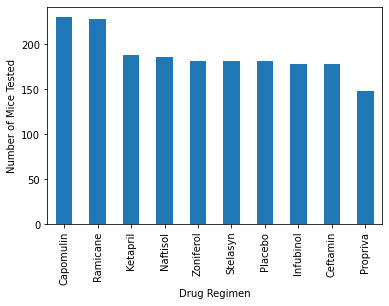

In [8]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
drug_regimen_df = clean_df.groupby('Drug Regimen')['Timepoint'].count()
drug_regimen_df = drug_regimen_df.sort_values(ascending=False)
plot_regimen = drug_regimen_df.plot(kind="bar", figsize=(6,4))
plt.ylabel("Number of Mice Tested")

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

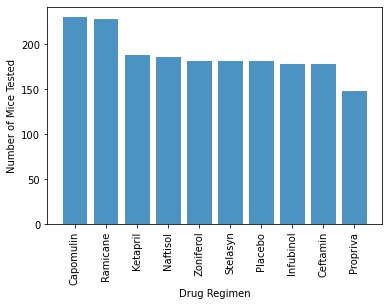

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
regimens = ["Capomulin", "Ramicane", "Ketapril", "Naftisol", "Zoniferol", 
            "Stelasyn", "Placebo", "Infubinol", "Ceftamin", "Propriva"]
plt.bar(regimens, drug_regimen_df, alpha=0.8, align="center")
plt.ylabel("Number of Mice Tested")
plt.xlabel("Drug Regimen")
plt.xticks(rotation="vertical")

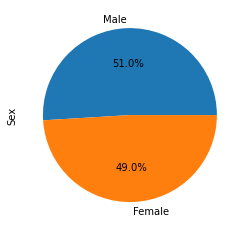

In [10]:
sexes = clean_df['Sex'].value_counts()
plot_sexes = sexes.plot(kind="pie", autopct="%1.1f%%")

([<matplotlib.patches.Wedge at 0x265df774808>,
 [Text(-0.03308201408261547, 1.0995024239828841, 'Male'),
  Text(0.033082014082615095, -1.0995024239828841, 'Female')],
 [Text(-0.01804473495415389, 0.5997285948997549, '51.0%'),
  Text(0.018044734954153686, -0.5997285948997549, '49.0%')])

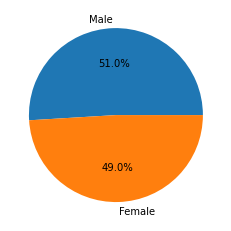

In [11]:
males = sexes[0]
females = sexes[1]
# Labels for the sections of our pie chart
labels = ["Male", "Female"]

# The values of each section of the pie chart
show_sexes = [males, females]

# The colors of each section of the pie chart
plt.pie(show_sexes, labels=labels, autopct="%1.1f%%")

## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
grouped_df = clean_df.groupby('Mouse ID').max()

# Start by getting the last (greatest) timepoint for each mouse

last_timepoints = grouped_df['Timepoint']
last_timepoints
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(last_timepoints, clean_df, on="Timepoint", how="left")
merged_df.head()

,Timepoint,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,45,k403,Ramicane,Male,21,16,22.050126,1
1,45,s185,Capomulin,Female,3,17,23.343598,1
2,45,x401,Capomulin,Female,16,15,28.484033,0
3,45,m601,Capomulin,Male,22,17,28.430964,1
4,45,g791,Ramicane,Male,11,16,29.128472,1


In [13]:
# Put treatments into a list for for loop (and later for plot labels)
four_treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = [ ]
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = merged_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq   
    # Locate the rows which contain mice on each drug and get the tumor volumes
merged_df = merged_df.loc[merged_df['Drug Regimen'].isin(four_treatments)]
merged_df.head()
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

,Timepoint,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,45,k403,Ramicane,Male,21,16,22.050126,1
1,45,s185,Capomulin,Female,3,17,23.343598,1
2,45,x401,Capomulin,Female,16,15,28.484033,0
3,45,m601,Capomulin,Male,22,17,28.430964,1
4,45,g791,Ramicane,Male,11,16,29.128472,1
